In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf
import quantum_backend as qb


🎉🥳 Syndrome heatmap generated! Time to rearrange the grid! 🎉🥳


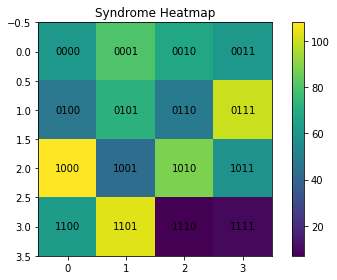

In [2]:
if __name__ == '__main__':
    hf.clear()
    backend = qb.get_QI_backend(backend_type="QX single-node simulator")
    np.random.seed(0) # fixed seed.
    p = np.random.rand(16)
    p = p/np.sum(p)
    shots = 1024
    default_valid_inputs = ["I","X0","Y0","Z0","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","X4","Y4","Z4"]

    counts = np.zeros(16)
    for i,elem in enumerate(default_valid_inputs):
        qc_job = qb.execute_QuantumCircuit(elem,backend=backend,shots=int(shots*p[i]))
        result_dict = qc_job.result().get_counts()
        key_max_val = max(result_dict, key=result_dict.get)
        counts[i] = result_dict[key_max_val]

    counts = counts.reshape([4,4])

    fig, ax = plt.subplots() # https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    im = ax.imshow(counts)
    for i in range(4):
        for j in range(4):
            text = ax.text(j, i, f"{np.binary_repr(i*4+j,4)}",
                        ha="center", va="center", color="k")
    ax.set_title("Syndrome Heatmap")
    fig.tight_layout()
    fig.colorbar(im)
    print(f"\n🎉🥳 {hf.OKGREEN}Syndrome heatmap generated! Time to rearrange the grid!{hf.ENDC} 🎉🥳")
    plt.show()